# Evaluation of the `HaGraD`-Optimizer with cifar10-Dataset

---

## Imports and Data-Preparation

In [1]:
## Tensorflow related
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

## General
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Hagrad custom optimizer
import sys; 
if "..\\" not in sys.path: sys.path.append("..\\")
from src.hagrad import Hagrad

In [2]:
## Fetch Mnist-Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape  == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape  == (10000, 1)
y_test  = y_test.flatten()
y_train = y_train.flatten()

In [3]:
## Class number and sanity check
num_classes = 10
assert np.all(np.sort(np.unique(y_train)) == np.arange(num_classes))

## Normalizing and expanding dimensions for ConvLayers
def perpare_X_data(X: np.ndarray) -> np.ndarray:
    X = X.astype(np.float32) / 255.
    return(X)

X_train = perpare_X_data(X_train)
X_test  = perpare_X_data(X_test)

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

---

## Defining Model generating function

Convnet inspired by https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/.

In [4]:
def conv_NN(
    input_shape: tuple,
    num_classes: int,
    optimizer: keras.optimizers.Optimizer,
    print_summary: bool=False) -> keras.Model:

    ## Defining the Model with Sequential API
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.SpatialDropout2D(0.2),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.SpatialDropout2D(0.3),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.SpatialDropout2D(0.4),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    ## Compiling the Model using the given Optimizer
    model.compile(
        loss=keras.losses.CategoricalCrossentropy(), 
        optimizer=optimizer, 
        metrics=["accuracy"])

    ## Optional: Print Model summary
    if print_summary: print(model.summary())

    return model


---

## Train the Network using different Optimizers

In [5]:
## Settings
batch_size  = 128
epochs      = 100
input_shape = X_train.shape[1:]

In [6]:
## Wrappers
def model_optimizer(optimizer):
    model = conv_NN(
        input_shape=input_shape, 
        num_classes=num_classes, 
        optimizer=optimizer, 
        print_summary=False)
    return model

def model_fit(model, verbose=2):
    fit = model.fit(
        X_train, y_train, 
        batch_size=batch_size, 
        epochs=epochs, 
        validation_data=(X_train, y_train), 
        verbose=verbose)
    return fit

#### Adam

In [7]:
keras.backend.clear_session()
model_adam = model_optimizer(keras.optimizers.Adam())
fit_adam = model_fit(model_adam)

Epoch 1/100
391/391 - 10s - loss: 2.2182 - accuracy: 0.1915 - val_loss: 1.9380 - val_accuracy: 0.2815
Epoch 2/100
391/391 - 6s - loss: 1.7975 - accuracy: 0.3185 - val_loss: 1.5301 - val_accuracy: 0.4221
Epoch 3/100
391/391 - 6s - loss: 1.6242 - accuracy: 0.3907 - val_loss: 1.3539 - val_accuracy: 0.4902
Epoch 4/100
391/391 - 6s - loss: 1.5027 - accuracy: 0.4443 - val_loss: 1.2506 - val_accuracy: 0.5246
Epoch 5/100
391/391 - 6s - loss: 1.3948 - accuracy: 0.4941 - val_loss: 1.6773 - val_accuracy: 0.4623
Epoch 6/100
391/391 - 6s - loss: 1.3092 - accuracy: 0.5280 - val_loss: 1.0192 - val_accuracy: 0.6296
Epoch 7/100
391/391 - 6s - loss: 1.2305 - accuracy: 0.5662 - val_loss: 0.9451 - val_accuracy: 0.6605
Epoch 8/100
391/391 - 6s - loss: 1.1572 - accuracy: 0.5908 - val_loss: 0.8547 - val_accuracy: 0.6955
Epoch 9/100
391/391 - 6s - loss: 1.1071 - accuracy: 0.6112 - val_loss: 0.8150 - val_accuracy: 0.7142
Epoch 10/100
391/391 - 6s - loss: 1.0582 - accuracy: 0.6324 - val_loss: 0.9532 - val_accur

### SGD

In [8]:
keras.backend.clear_session()
model_sgd = model_optimizer(keras.optimizers.SGD())
fit_sgd = model_fit(model_sgd)

Epoch 1/100
391/391 - 8s - loss: 2.4920 - accuracy: 0.1398 - val_loss: 2.3654 - val_accuracy: 0.1551
Epoch 2/100
391/391 - 6s - loss: 2.1153 - accuracy: 0.1865 - val_loss: 2.1077 - val_accuracy: 0.2072
Epoch 3/100
391/391 - 6s - loss: 2.0026 - accuracy: 0.2212 - val_loss: 1.8891 - val_accuracy: 0.2726
Epoch 4/100
391/391 - 6s - loss: 1.9453 - accuracy: 0.2433 - val_loss: 1.8675 - val_accuracy: 0.2777
Epoch 5/100
391/391 - 6s - loss: 1.8917 - accuracy: 0.2693 - val_loss: 1.7986 - val_accuracy: 0.3155
Epoch 6/100
391/391 - 6s - loss: 1.8584 - accuracy: 0.2833 - val_loss: 1.7029 - val_accuracy: 0.3515
Epoch 7/100
391/391 - 6s - loss: 1.8270 - accuracy: 0.2988 - val_loss: 1.7084 - val_accuracy: 0.3560
Epoch 8/100
391/391 - 6s - loss: 1.7962 - accuracy: 0.3155 - val_loss: 1.6742 - val_accuracy: 0.3824
Epoch 9/100
391/391 - 6s - loss: 1.7671 - accuracy: 0.3239 - val_loss: 1.6365 - val_accuracy: 0.4057
Epoch 10/100
391/391 - 6s - loss: 1.7422 - accuracy: 0.3358 - val_loss: 1.5921 - val_accura

### HaGraD

In [9]:
keras.backend.clear_session()
hagrad_optimizer = Hagrad()
print(hagrad_optimizer.get_config())
model_hagrad = model_optimizer(hagrad_optimizer)
fit_hagrad = model_fit(model_hagrad)

{'name': 'hagrad', 'epsilon': 1.0, 'gamma': 10.0, 'delta': 0.09090909090909091, 'kinetic_energy_gradient': 'Relativistic kinetic energy sqrt( ||p||^2 + 1 )-1 with gradient p/sqrt( ||p||^2 + 1 )'}
Epoch 1/100
391/391 - 10s - loss: 2.2875 - accuracy: 0.2175 - val_loss: 1.9677 - val_accuracy: 0.2794
Epoch 2/100
391/391 - 7s - loss: 1.8550 - accuracy: 0.3081 - val_loss: 1.6755 - val_accuracy: 0.3829
Epoch 3/100
391/391 - 7s - loss: 1.7227 - accuracy: 0.3641 - val_loss: 1.4744 - val_accuracy: 0.4446
Epoch 4/100
391/391 - 7s - loss: 1.6218 - accuracy: 0.4057 - val_loss: 1.3962 - val_accuracy: 0.4710
Epoch 5/100
391/391 - 7s - loss: 1.5462 - accuracy: 0.4342 - val_loss: 1.3134 - val_accuracy: 0.5149
Epoch 6/100
391/391 - 7s - loss: 1.4839 - accuracy: 0.4612 - val_loss: 1.2234 - val_accuracy: 0.5540
Epoch 7/100
391/391 - 7s - loss: 1.4223 - accuracy: 0.4856 - val_loss: 1.2842 - val_accuracy: 0.5303
Epoch 8/100
391/391 - 7s - loss: 1.3668 - accuracy: 0.5138 - val_loss: 1.2080 - val_accuracy: 0.

---

## Visualizing

Keras is evaluating the validation error at the end of each epoch. Therefore teh validation errors get shifted for the visualization:

In [10]:
epochs_arr = np.arange(epochs)
epochs_arr_val = epochs_arr + 1

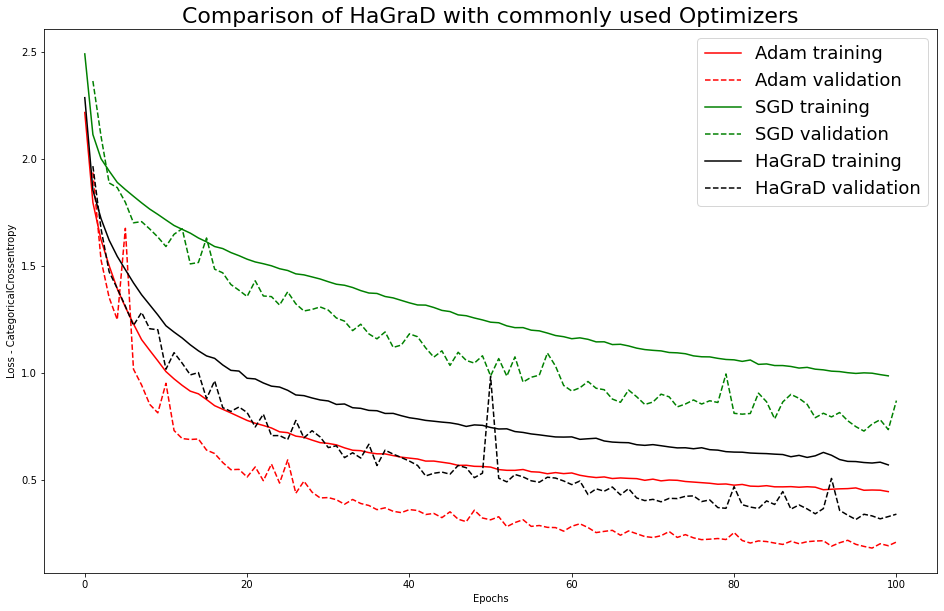

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title("Comparison of HaGraD with commonly used Optimizers", fontsize=22)
ax.plot(epochs_arr,     fit_adam.history['loss'],       "r-",  label="Adam training") 
ax.plot(epochs_arr_val, fit_adam.history['val_loss'],   "r--", label="Adam validation") 
ax.plot(epochs_arr,     fit_sgd.history['loss'],        "g-",  label="SGD training") 
ax.plot(epochs_arr_val, fit_sgd.history['val_loss'],    "g--", label="SGD validation") 
ax.plot(epochs_arr,     fit_hagrad.history['loss'],     "k-",  label="HaGraD training") 
ax.plot(epochs_arr_val, fit_hagrad.history['val_loss'], "k--", label="HaGraD validation") 
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss - CategoricalCrossentropy")
leg = ax.legend(frameon=True, fontsize=18)
plt.show()
plt.close()

---